In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
df = pd.read_csv("../dataset/Final_Dataset_CS.csv")

In [140]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower()

df.columns = df.columns.str.lower()

In [141]:
df.head()

,source port,destination port,protocol,packet length,packet type,traffic type,malware indicators,anomaly scores,alerts/warnings,attack signature,...,geo-location data,browser,device/os,year,month,day,hour,dayofweek,severity level,attack type
0,31225,17616,icmp,503,data,http,ioc detected,28.67,no,known pattern b,...,"jamshedpur, sikkim",mozilla,windows,2023,5,30,6,1,low,malware
1,17245,48166,icmp,1174,data,http,ioc detected,51.50,no,known pattern a,...,"bilaspur, nagaland",mozilla,windows,2020,8,26,7,2,low,malware
2,16811,53600,udp,306,control,http,ioc detected,87.42,yes,known pattern b,...,"bokaro, rajasthan",mozilla,windows,2022,11,13,8,6,low,ddos
3,20018,32534,udp,385,data,http,no detection,15.79,yes,known pattern b,...,"jaunpur, rajasthan",mozilla,macintosh,2023,7,2,10,6,medium,malware
4,6131,26646,tcp,1462,data,dns,no detection,0.52,yes,known pattern b,...,"anantapur, tripura",mozilla,windows,2023,7,16,13,6,low,ddos


In [142]:
df.shape

(40000, 22)

In [143]:
df.info

<bound method DataFrame.info of        source port  destination port protocol  packet length packet type  \
0            31225             17616     icmp            503        data   
1            17245             48166     icmp           1174        data   
2            16811             53600      udp            306     control   
3            20018             32534      udp            385        data   
4             6131             26646      tcp           1462        data   
...            ...               ...      ...            ...         ...   
39995        31005              6764      udp           1428     control   
39996         2553             28091      udp           1184     control   
39997        22505             25152      udp           1043        data   
39998        20013              2703      udp            483        data   
39999        50137             55575     icmp           1175     control   

      traffic type malware indicators  anomaly scores a

In [144]:
df.describe

<bound method NDFrame.describe of        source port  destination port protocol  packet length packet type  \
0            31225             17616     icmp            503        data   
1            17245             48166     icmp           1174        data   
2            16811             53600      udp            306     control   
3            20018             32534      udp            385        data   
4             6131             26646      tcp           1462        data   
...            ...               ...      ...            ...         ...   
39995        31005              6764      udp           1428     control   
39996         2553             28091      udp           1184     control   
39997        22505             25152      udp           1043        data   
39998        20013              2703      udp            483        data   
39999        50137             55575     icmp           1175     control   

      traffic type malware indicators  anomaly scores

In [145]:
df.size

880000

In [146]:
df.corr

<bound method DataFrame.corr of        source port  destination port protocol  packet length packet type  \
0            31225             17616     icmp            503        data   
1            17245             48166     icmp           1174        data   
2            16811             53600      udp            306     control   
3            20018             32534      udp            385        data   
4             6131             26646      tcp           1462        data   
...            ...               ...      ...            ...         ...   
39995        31005              6764      udp           1428     control   
39996         2553             28091      udp           1184     control   
39997        22505             25152      udp           1043        data   
39998        20013              2703      udp            483        data   
39999        50137             55575     icmp           1175     control   

      traffic type malware indicators  anomaly scores a

In [147]:
df.isnull().sum().sort_values(ascending=False)

source port           0
destination port      0
protocol              0
packet length         0
packet type           0
traffic type          0
malware indicators    0
anomaly scores        0
alerts/warnings       0
attack signature      0
action taken          0
user information      0
geo-location data     0
browser               0
device/os             0
year                  0
month                 0
day                   0
hour                  0
dayofweek             0
severity level        0
attack type           0
dtype: int64

In [148]:
df['attack type'].value_counts()

attack type
ddos         13428
malware      13307
intrusion    13265
Name: count, dtype: int64

In [149]:
for col in ['protocol', 'packet type', 'traffic type', 'device/os', 'browser']:
    print(f"\n{col}:", df[col].value_counts())


protocol: protocol
icmp    13429
udp     13299
tcp     13272
Name: count, dtype: int64

packet type: packet type
control    20237
data       19763
Name: count, dtype: int64

traffic type: traffic type
dns     13376
http    13360
ftp     13264
Name: count, dtype: int64

device/os: device/os
windows      17953
linux         8840
macintosh     5813
ipod          2656
android       1620
iphone        1567
ipad          1551
Name: count, dtype: int64

browser: browser
mozilla    31951
opera       8049
Name: count, dtype: int64


array([[<Axes: title={'center': 'packet length'}>,
        <Axes: title={'center': 'anomaly scores'}>]], dtype=object)

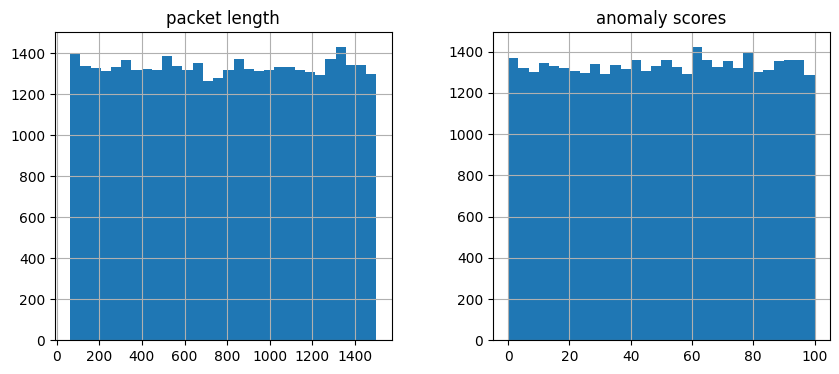

In [150]:
df[['packet length', 'anomaly scores']].describe()
df[['packet length', 'anomaly scores']].hist(bins=30, figsize=(10, 4))

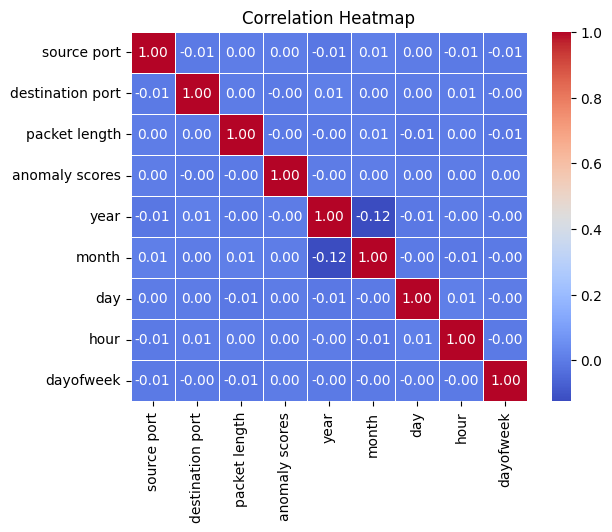

In [151]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', linewidths=0.5, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [152]:
df.groupby('attack type')['anomaly scores'].mean().sort_values(ascending=False)

attack type
ddos         50.235063
malware      50.125794
intrusion    49.978029
Name: anomaly scores, dtype: float64

<Axes: title={'center': 'Attacks by Hour'}, xlabel='hour'>

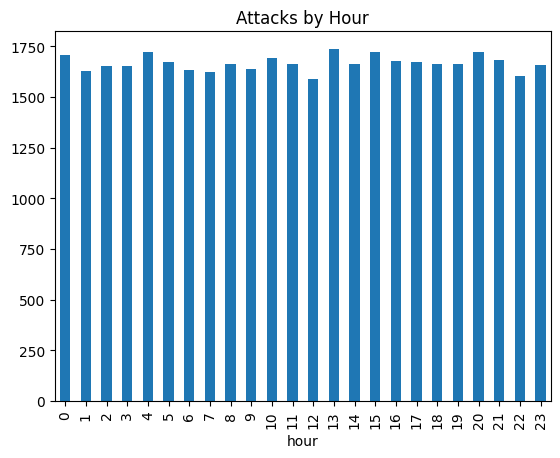

In [153]:
df['hour'].value_counts().sort_index().plot(kind='bar', title='Attacks by Hour')

In [154]:
y1 = df["attack type"]
y2 = df["severity level"]


x = df.drop(columns=["attack type", "severity level"])

In [155]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Apply to each categorical column
x['protocol'] = le.fit_transform(x['protocol'])
x['packet type'] = le.fit_transform(x['packet type'])
x['traffic type'] = le.fit_transform(x['traffic type'])

In [156]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree 

In [157]:

x_train, x_test, y_train, y_test = train_test_split(x, y1, test_size=0.2, random_state=42)

In [158]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

ValueError: could not convert string to float: 'ioc detected'